In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

In [104]:
titanic_df = pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [105]:
# Taking q quick information on the data
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


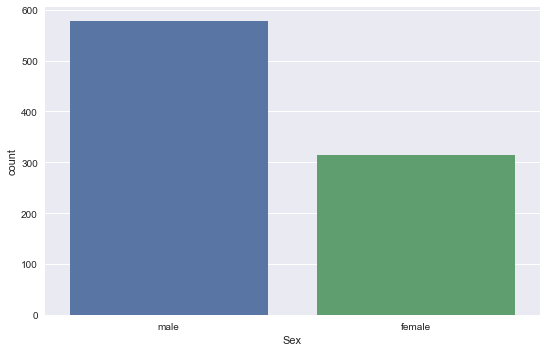

In [106]:
sns.factorplot('Sex',data=titanic_df,kind='count',size=5,aspect=1.5)

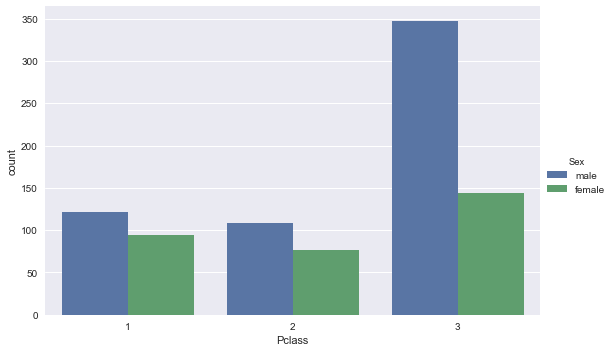

In [107]:
sns.factorplot('Pclass',data=titanic_df,kind = 'count',hue='Sex',size=5,aspect=1.5)

In [108]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [109]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

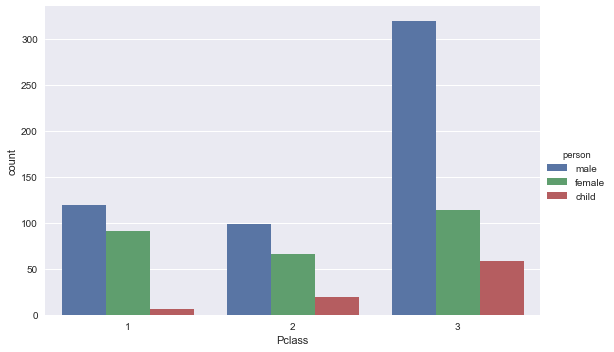

In [110]:
sns.factorplot('Pclass',data =titanic_df,kind='count',hue='person',size=5,aspect=1.5)

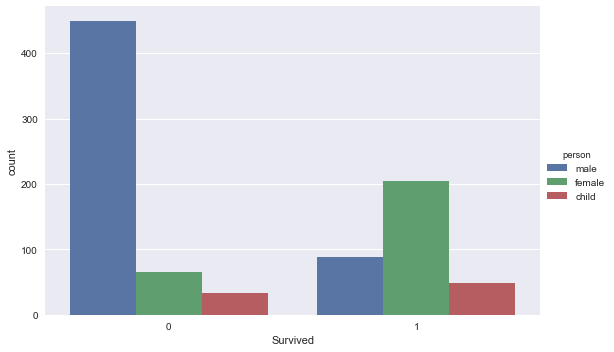

In [111]:
sns.factorplot('Survived',data =titanic_df,kind='count',hue='person',size=5,aspect=1.5)

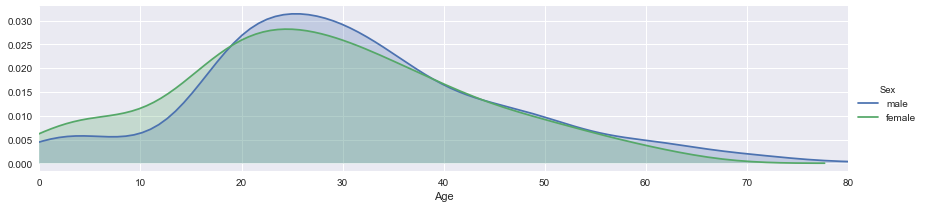

In [112]:
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
fig.set(xlim=(0,titanic_df['Age'].max()))
fig.add_legend()

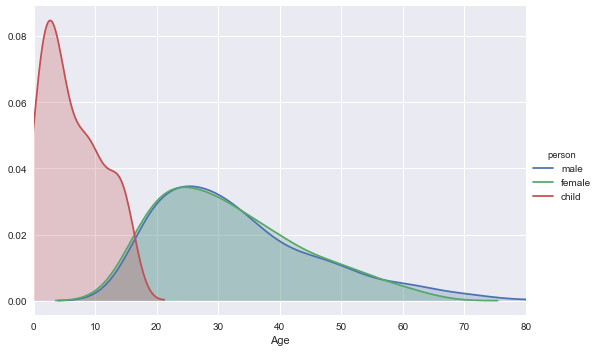

In [113]:
fig = sns.FacetGrid(titanic_df,hue='person',size=5,aspect=1.5)
fig.map(sns.kdeplot,'Age',shade=True)

fig.set(xlim=(0,titanic_df['Age'].max()))
fig.add_legend()

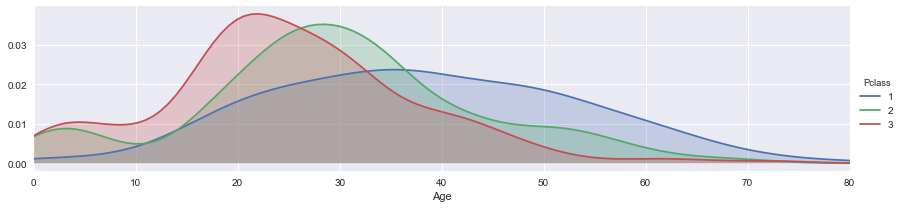

In [114]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

fig.set(xlim=(0,titanic_df['Age'].max()))
fig.add_legend()

In [115]:
deck = titanic_df['Cabin'].dropna()

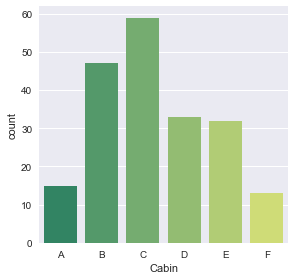

In [116]:
levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = pd.DataFrame(levels)
cabin_df.columns=['Cabin']
sns.factorplot('Cabin',data= cabin_df,kind='count',palette='summer',order = ['A','B','C','D','E','F'])

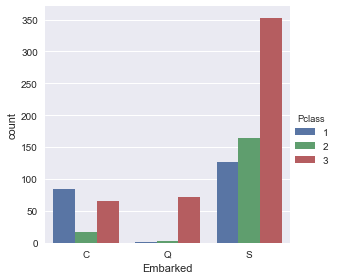

In [117]:
sns.factorplot('Embarked',data=titanic_df,kind='count',hue='Pclass',order=['C','Q','S'])

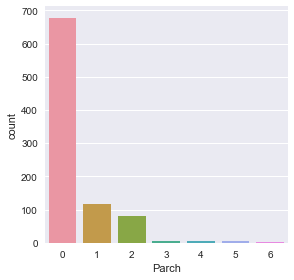

In [118]:
sns.factorplot('Parch',data=titanic_df, kind = 'count')

In [119]:
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone'].loc[titanic_df['Alone'] > 0]= 'with family'
titanic_df['Alone'].loc[titanic_df['Alone'] ==0]= 'alone'

C:\Users\NP\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


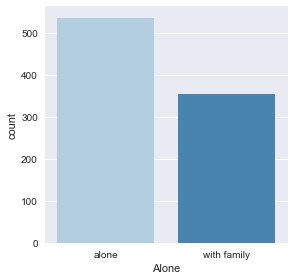

In [120]:
sns.factorplot('Alone',data= titanic_df,kind='count',palette='Blues',order=['alone','with family'])

In [121]:
titanic_df['Surviver'] = titanic_df.Survived.map({0:'no',1:'yes'})

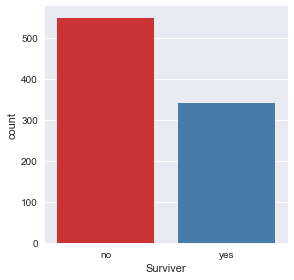

In [122]:
sns.factorplot('Surviver',data=titanic_df,kind='count',palette='Set1')

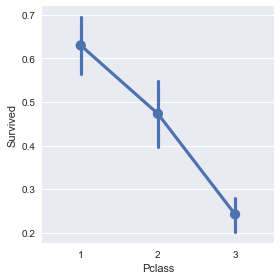

In [123]:
sns.factorplot('Pclass','Survived',data=titanic_df)

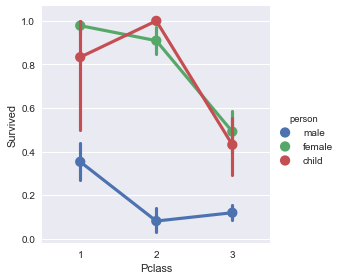

In [124]:
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df)

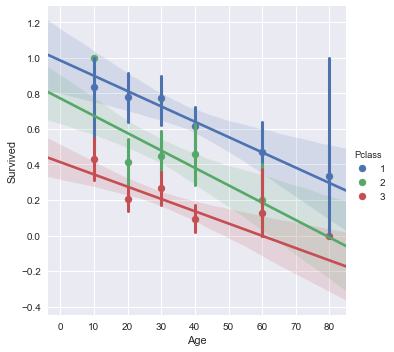

In [125]:
generations = [10,20,30,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,x_bins=generations)

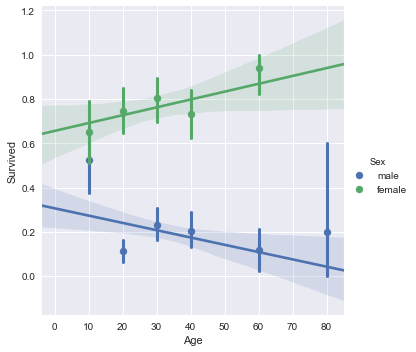

In [126]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,x_bins=generations)

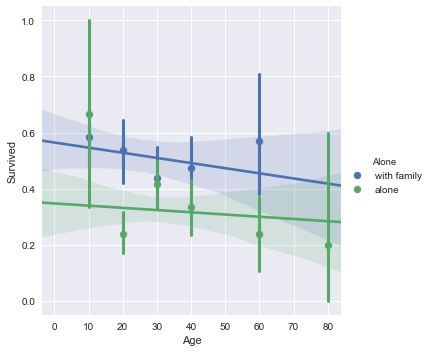

In [127]:
sns.lmplot('Age','Survived',hue='Alone',data= titanic_df,x_bins=generations)

In [133]:
titanic_df = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
full_data = [titanic_df, test_data]

# Derived Feature Has_Cabin that tells whether a passenger had a cabin on the Titanic or not
titanic_df['Has_Cabin'] = titanic_df["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test_data['Has_Cabin'] = test_data["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

# Derived Feature FamilySize as a combination of SibSp and Parch
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
# Derived feature IsAlone from another Derived Feature: FamilySize
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

#Imputing Missing Values
# Replacing NULL values with most occuring value (mode) in the Embarked column
dataset['Embarked'].isnull().sum()
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    
# Replacing NULL values with the median value in the Fare column
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(titanic_df['Fare'].median()) 
    
# Replacing NULL values for Age column
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    # Generate random numbers between (mean — std) and (mean + std)
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    # Fill NaN values in Age column with random values generated
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)    
    
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

# Derived feature Title containing the titles of passenger names
for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
    
# Group all non-common titles into one single grouping "Other"
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    # Fixing misspelled titles
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

C:\Users\NP\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [134]:
for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
       
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    

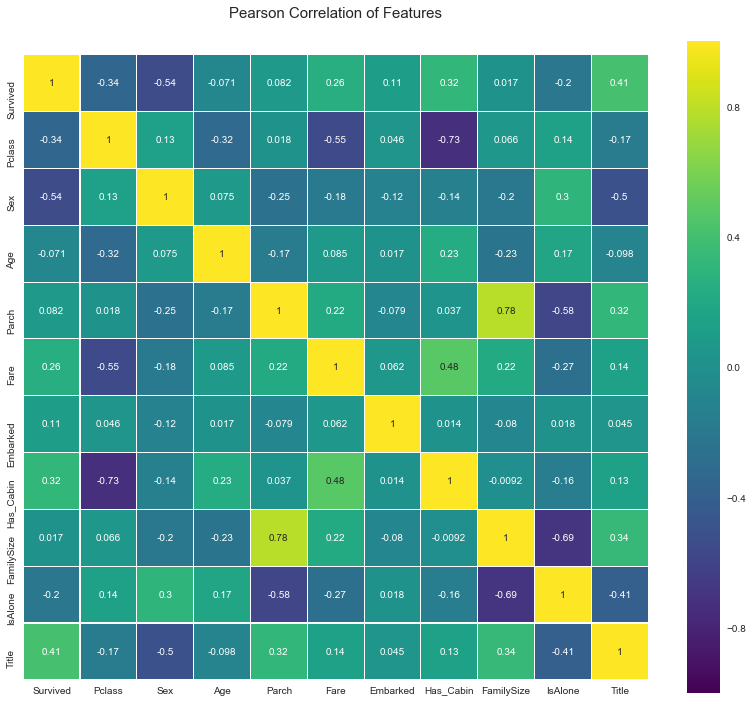

In [135]:
# Feature selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
titanic_df = titanic_df.drop(drop_elements, axis=1)
test_data1  = test_data.drop(drop_elements, axis=1)
# generate Pearson Correlation Heatmap
colormap = plt.cm.viridis
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(titanic_df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)


In [136]:
from sklearn.model_selection import train_test_split
X = titanic_df.drop("Survived", axis=1)
y = titanic_df["Survived"]

# Create training and test sets from training data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

# Random Forest  Model Fitting and Performance Metrics
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=73, max_depth=6, max_features="sqrt")
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
random_forest_acc_score = round(random_forest.score(X_train, y_train) * 100, 2)
print("***Random Forest***")
print("Accuracy Score:", random_forest_acc_score)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
y_pred_prob = random_forest.predict_proba(X_test)[:,1]
print("ROC_AUC Score:")
print(roc_auc_score(y_test, y_pred_prob))

***Random Forest***
Accuracy Score: 88.92
Confusion Matrix:
[[139  18]
 [ 31  80]]
Classification Report:
             precision    recall  f1-score   support

          0       0.82      0.89      0.85       157
          1       0.82      0.72      0.77       111

avg / total       0.82      0.82      0.82       268

ROC_AUC Score:
0.885120789579


In [ ]:
y_result = random_forest.predict(test_data1)
result = pd.DataFrame()
result['PassengerId'] = test_data['PassengerId']

result['Survived'] = y_result

result.to_csv('Titanic_F.csv',index = False)
